### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [68]:
data = pd.read_csv('data/coupons.csv')

In [69]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [70]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Taking a look at columns that have missing values:

In [71]:
data["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [72]:
data["Bar"].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [73]:
data["CoffeeHouse"].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [74]:
data["CarryAway"].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [75]:
data["RestaurantLessThan20"].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [76]:
data["Restaurant20To50"].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...
The "car" column only has 108 non-null values, and the non-null data do not seem to contain meaningful content - I decided to drop the column.
Also from this point on I will use df as the cleaned dataframe.

If we had access to additional information on the other columns examined above I'd attempt to impute. Lacking such info I decided to drop the observations containing missing values.

In [77]:
df=data.drop(columns="car")
df=df.dropna()

df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [78]:
print("accept proportion= {:.2f}".format(df[df["Y"]==1].shape[0]/df.shape[0]))

accept proportion= 0.57


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon accepted/not accepted broken down by coupon type')

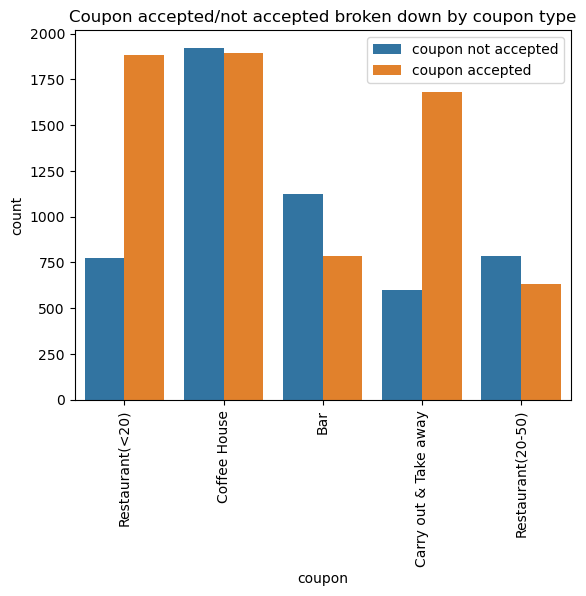

In [79]:
sns.countplot(data=df, x="coupon", hue="Y")
plt.xticks(rotation=90)
plt.legend(["coupon not accepted", "coupon accepted"])
plt.title("Coupon accepted/not accepted broken down by coupon type")



6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

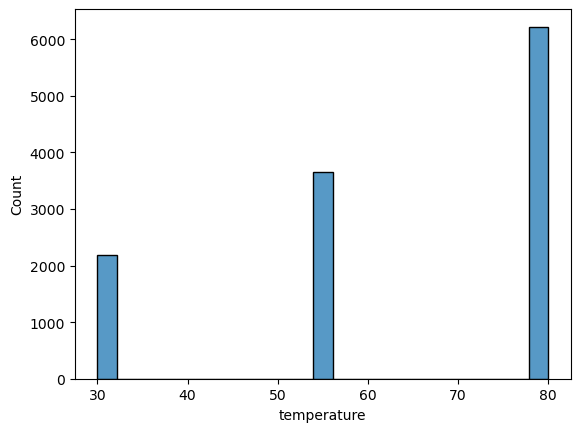

In [80]:
sns.histplot(data=df, x="temperature")
plt.title("temperature histogram")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [81]:
bar=df[df["coupon"]=="Bar"]
bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [82]:
print("Bar coupon accept proportion={:.3f}".format(bar[bar["Y"]==1].shape[0]/bar.shape[0]))

Bar coupon accept proportion=0.412


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [83]:
fewer3=bar[(bar["Bar"]=="never") | (bar["Bar"]=="less1") | (bar["Bar"]=="1~3")]
more3=bar[(bar["Bar"]=="gt8") | (bar["Bar"]=="4~8")]


print("Acceptance rate for those who went to a bar 3 or fewer times= {:.3f}".format(fewer3[fewer3["Y"]==1].shape[0]/fewer3.shape[0]))
print("Acceptance rate for those who went to a bar more than 3 times= {:.3f}".format(more3[more3["Y"]==1].shape[0]/more3.shape[0]))


Acceptance rate for those who went to a bar 3 or fewer times= 0.373
Acceptance rate for those who went to a bar more than 3 times= 0.762


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [84]:
# num drivers who go to a bar more than once a month and are over the age of 25:

mask=( (bar["Bar"]=="gt8") | (bar["Bar"]=="4~8") | (bar["Bar"]=="1~3") ) & ((bar["Bar"] != "below21") & (bar["Bar"] != "21") )

group1_df=bar[mask]
group2_df=bar[~mask]
accepted1=group1_df[group1_df["Y"]==1]
accepted2=group2_df[group2_df["Y"]==1]

print("Acceptance rate for drivers who go to a bar more than once a month and are > 25 yo= {:.3f}".format(accepted1.shape[0] / group1_df.shape[0]))
print("Acceptance rate for other drivers= {:.3f}".format(accepted2.shape[0] / group2_df.shape[0]))

Acceptance rate for drivers who go to a bar more than once a month and are > 25 yo= 0.685
Acceptance rate for other drivers= 0.295


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [85]:
mask2=( ((bar["Bar"]=="gt8") | (bar["Bar"]=="4~8") | (bar["Bar"]=="1~3")) & (bar["passanger"] != "Kid(s)") & (bar["passanger"] != "Alone") & \
    (bar["occupation"] != "Farming Fishing & Forestry") ) 

group3_df=bar[mask2]
group4_df=bar[~mask2]
accepted3=group3_df[group3_df["Y"]==1]
accepted4=group4_df[group4_df["Y"]==1]


print("Acceptance rate for selection as described= {:.3f}".format(accepted3.shape[0] / group3_df.shape[0]))
print("Acceptance rate for the other drivers= {:.3f}".format(accepted4.shape[0] / group4_df.shape[0]))


Acceptance rate for selection as described= 0.714
Acceptance rate for the other drivers= 0.379


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [86]:
mask_attendance_gt1=(bar["Bar"]=="gt8") | (bar["Bar"]=="4~8") | (bar["Bar"]=="1~3")
mask3= ( mask_attendance_gt1 & (bar["passanger"] != "Kid(s)") & (bar["maritalStatus"] != "Widowed") ) 
mask4= ( mask_attendance_gt1 & ( (bar["age"]=="below21") | (bar["age"]=="21") | (bar["age"]=="26") | (bar["age"]=="31") ) )
mask5= ( ((bar["RestaurantLessThan20"]=="4~8") | (bar["RestaurantLessThan20"]=="gt8")) & \
    ( (bar["income"]=="Less than $12500") | (bar["income"]=="$12500 - $24999") | (bar["income"]=="$25000 - $37499") | \
        (bar["income"]=="$37500 - $49999")) )


group3_df=bar[mask3]
group4_df=bar[mask4]
group5_df=bar[mask5]
accepted3=group3_df[group3_df["Y"]==1]
accepted4=group4_df[group4_df["Y"]==1]
accepted5=group5_df[group5_df["Y"]==1]


print("go to bars more than once a month, had passengers that were not a kid, and were not widowed: {:.3f}".format(accepted3.shape[0] / group3_df.shape[0]))
print("go to bars more than once a month and are under the age of 30: {:.3f}".format(accepted4.shape[0] / group4_df.shape[0]))
print("go to cheap restaurants more than 4 times a month and income is less than 50K: {:.3f}".format(accepted5.shape[0] / group5_df.shape[0]))

go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.709
go to bars more than once a month and are under the age of 30: 0.705
go to cheap restaurants more than 4 times a month and income is less than 50K: 0.456


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who visited a bar 3 or more times a month have a higher acceptance rate than those who visited fewer than 3 times a month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I choose to analyze the Coffee House coupons. First I compute its base acceptance rate.

In [87]:
coffee=df[df["coupon"]=="Coffee House"]

print("Coffee House coupon acceptance rate= {:.3f}".format(coffee[coffee["Y"]==1].shape[0]/coffee.shape[0]))

Coffee House coupon acceptance rate= 0.496


The Bar coupons analysis above showed that folks who frequent the coupon's institutions are likelier to accept the coupon. Check if this is true for Coffee House coupons too.

Text(0.5, 1.0, 'coupon accepted not accepted by CoffeeHouse vist frequency')

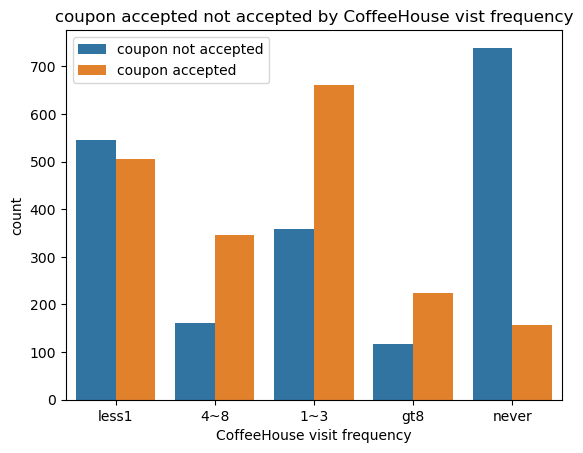

In [94]:
sns.countplot(data=coffee, x="CoffeeHouse", hue="Y")
plt.xlabel("CoffeeHouse visit frequency")
plt.legend(["coupon not accepted", "coupon accepted"])
plt.title("coupon accepted/not accepted by CoffeeHouse vist frequency")

The plot above shows that the stated assumption is true. We compute the acceptance rate for people who visit CoffeeHouses more than once a month. Calculation that immediately follows show that the acceptance rate for this category is ~65.9%. Can we find a group that has acceptance rate higher than this?

In [89]:
freq=["never", "less1", "1~3", "4~8", "gt8"]
more1=freq[2:]
cof_more1=coffee.query("CoffeeHouse in @more1")
cof_more1_acc=cof_more1.query("Y==1")

print("acceptance rate for people that visit more than once per month= {:.3f}".format( cof_more1_acc.shape[0] / cof_more1.shape[0] ))

acceptance rate for people that visit more than once per month= 0.659


Perhaps income has to do with acceptance rate? The default list of income groups are not ordered by numerical magnitude, so I first fix that.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Less than $12500'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, '$100000 or More')])

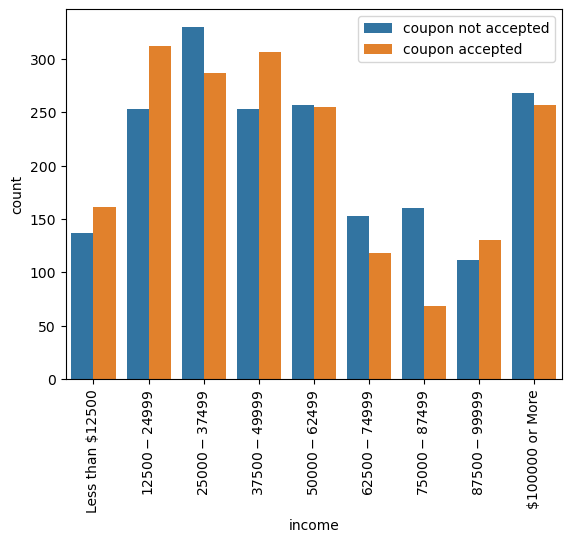

In [90]:
income_lev=["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"]

sns.countplot(data=coffee, x="income", hue="Y", order=income_lev)
plt.xlabel("income")
plt.legend(["coupon not accepted", "coupon accepted"])
plt.xticks(rotation=90)
plt.title("coupon accepted/not accepted by income level")

It looks as if folks having income < $25,000 are more likely to accept the coupon. I try the intersection of folks that visit more than once per month and having income < $25,000. This yields a slightly higher rate, as computed below.

In [91]:
inc_lt25000=income_lev[0:3]
cof_more1_inc_lt25000=cof_more1.query("income in @inc_lt25000")

print("acceptance rate for people that visit more than once per month & have income < $25,000= {:.3f}".format( \
    cof_more1_inc_lt25000[cof_more1_inc_lt25000["Y"]==1].shape[0] / cof_more1_inc_lt25000.shape[0] ))

acceptance rate for people that visit more than once per month & have income < $25,000= 0.687


Now I try to add some contextual attributes to define candidate groups. 

acceptance rate for people that visit more than once per month & have income < $25,000 & don't have an urgent destination= 0.761


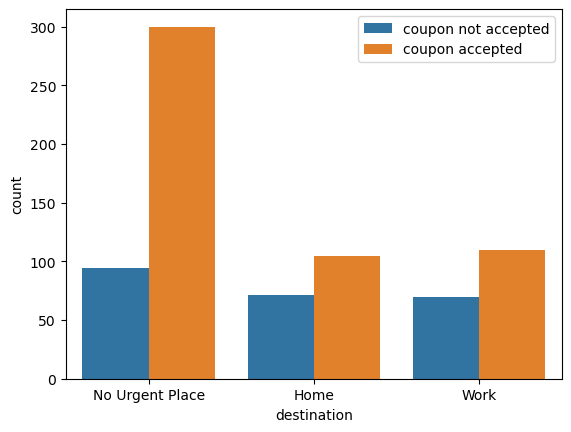

In [92]:
sns.countplot(data=cof_more1_inc_lt25000, x="destination", hue="Y")
plt.xlabel("destination")
plt.legend(["coupon not accepted", "coupon accepted"])
plt.title("coupon accepted/not accepted by destination")

cof_more1_inc_lt25000_nodest=cof_more1_inc_lt25000.query("destination in 'No Urgent Place'")

print("acceptance rate for people that visit more than once per month & have income < $25,000 & don't have an urgent destination= {:.3f}".format( \
    cof_more1_inc_lt25000_nodest[cof_more1_inc_lt25000_nodest["Y"]==1].shape[0] / cof_more1_inc_lt25000_nodest.shape[0] ))

Can we achieve acceptance rate >= 80%? Turns out we can, if we restrict the time to destination column to less than 15 minutes (set df["toCoupon_GEQ15min"]==0, where df is our current dataframe).

acceptance rate for 1) visit more than once, 2) have income < $25,000, 3) doesn't have an urgent destination, 4) time to coupon destination<15min= 0.805


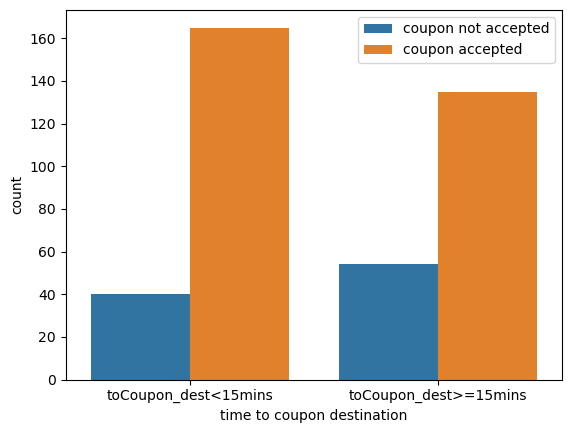

In [93]:

sns.countplot(data=cof_more1_inc_lt25000_nodest, x="toCoupon_GEQ15min", hue="Y")
plt.xticks(ticks=[0, 1], labels=["toCoupon_dest<15mins", "toCoupon_dest>=15mins"])
plt.xlabel("time to coupon destination")
plt.legend(["coupon not accepted", "coupon accepted"])
plt.title("coupon accepted/not accepted by time to coupon destination")

cof_more1_inc_lt25000_nodest_tlt15=cof_more1_inc_lt25000_nodest.query("toCoupon_GEQ15min==0")

print("acceptance rate for 1) visit more than once, 2) have income < $25,000, 3) doesn't have an urgent destination, 4) time to coupon destination<15min= {:.3f}".format( \
    cof_more1_inc_lt25000_nodest_tlt15[cof_more1_inc_lt25000_nodest_tlt15["Y"]==1].shape[0] / cof_more1_inc_lt25000_nodest_tlt15.shape[0] ))